In [1]:
# Library for linear algebra
import numpy as np
# Library and functions for the plots
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from matplotlib.image import NonUniformImage
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from matplotlib.colors import LogNorm

In [2]:
def fmt(x, pos):
    # format for colorbars tick labels
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)  

In [3]:
## Parameters of plots
axisticslabelfontsize=9
axisticslabelfontsizeinset=7
axislabelfontsize=11
axislabelfontsizeinset=9
legendfontsize=7
lineswidth = 2
ncontour = 25
cmap = plt.get_cmap('RdBu') 

In [4]:
namecoeff="Coeff"
nameviol="Violation"

In [5]:
c=np.loadtxt("Coeff.xyz")
constraint = np.zeros_like(c[:,0])
for i in range(c.shape[0]):
    constraint[i] = np.sum(c[i,:])-1.0

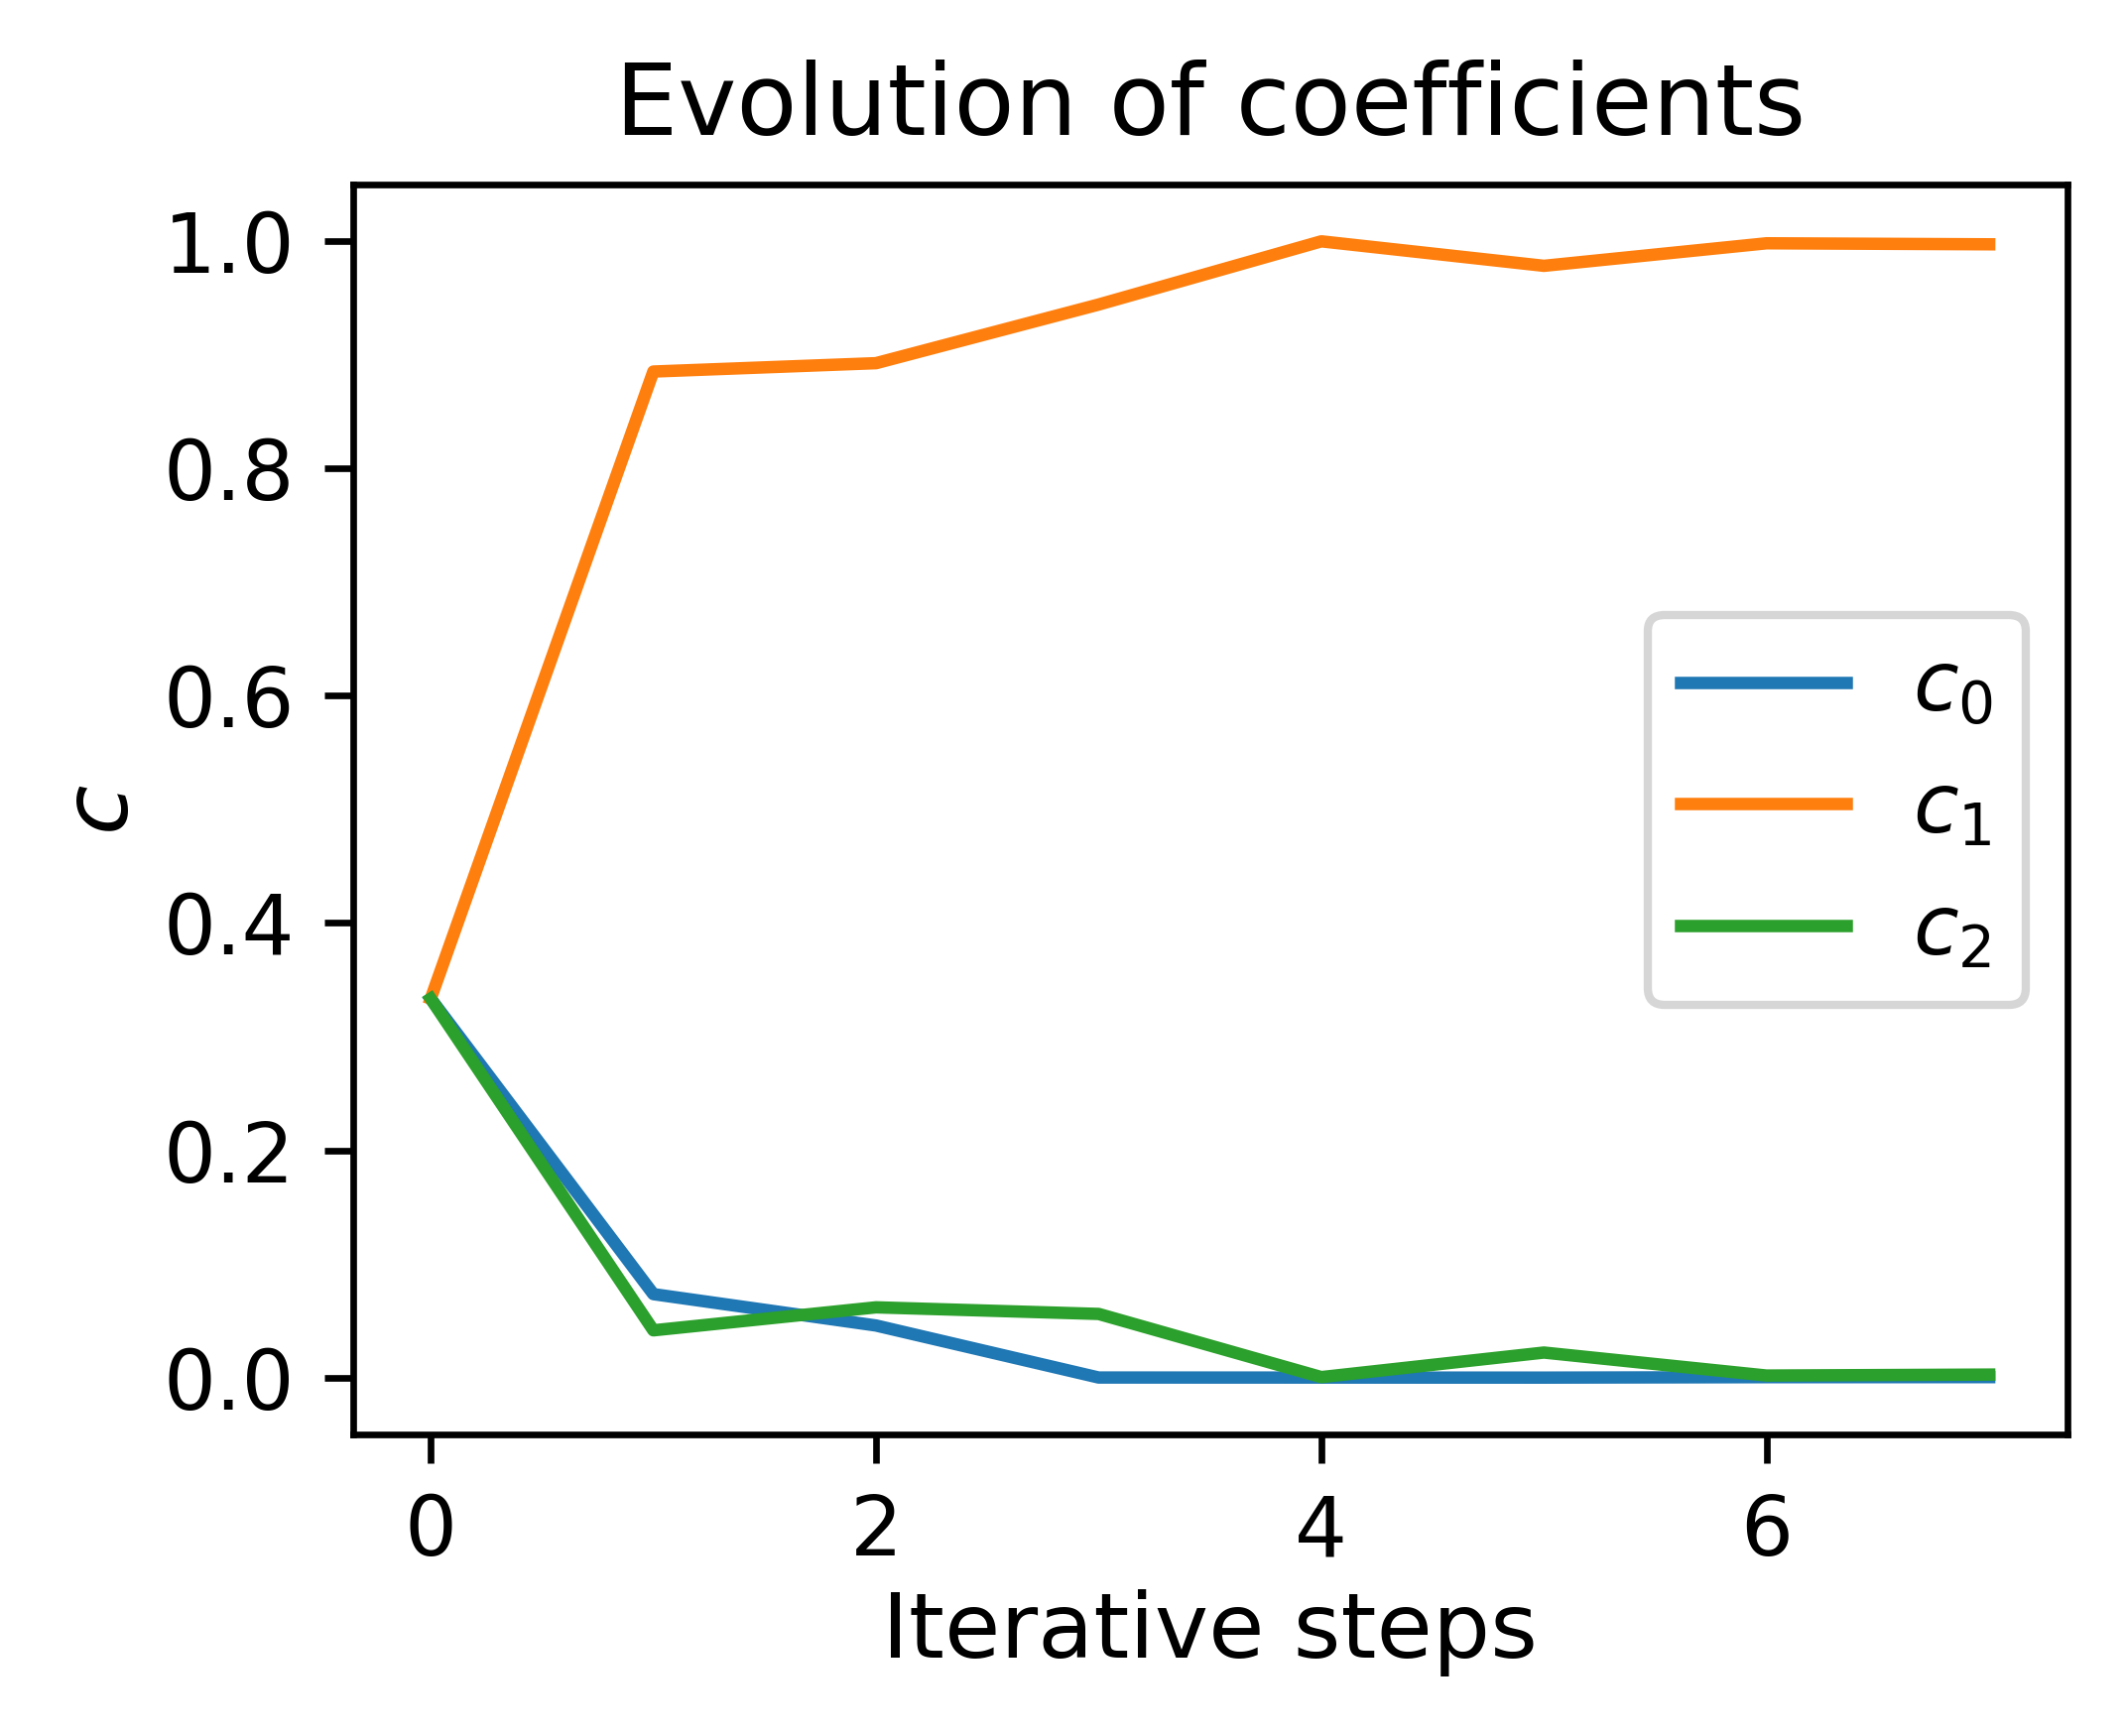

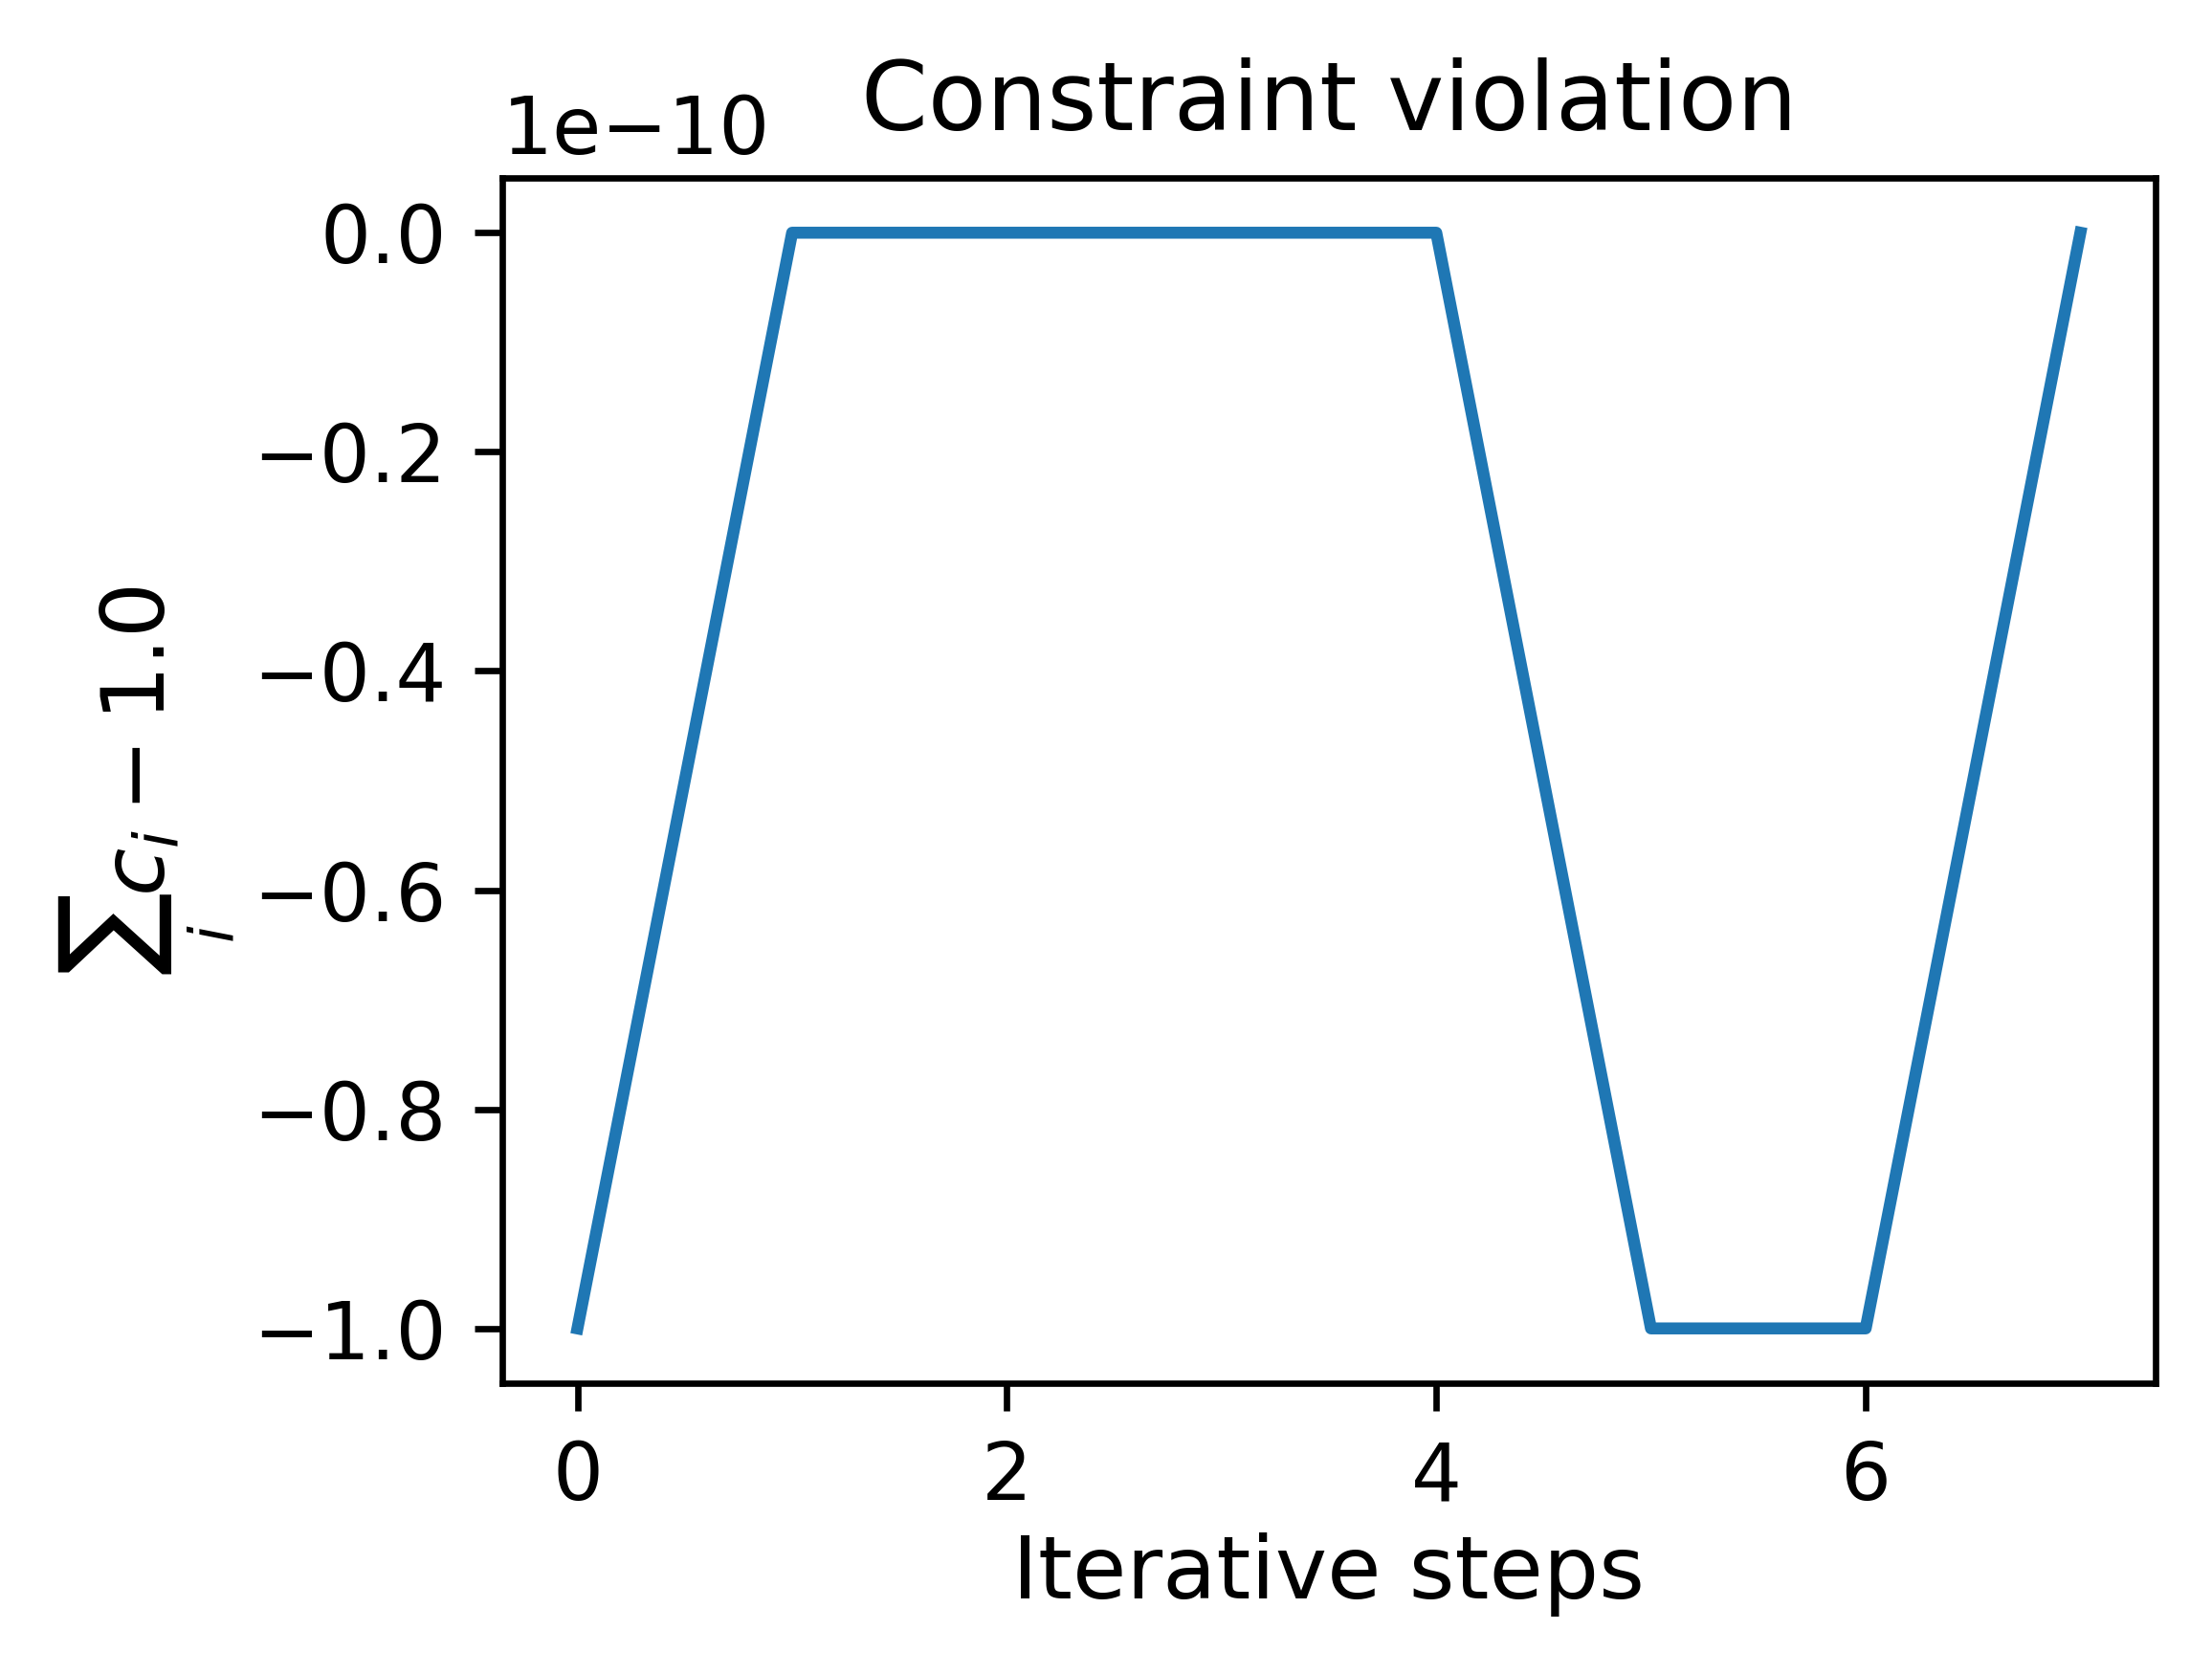

In [6]:
with PdfPages(namecoeff+".pdf") as pdf:
    fmt1 = '%r %%'
    fig = plt.figure(figsize=(4.,2.8),dpi=600)
    plt.rc('text')
    panel = fig.add_axes([0.15, 0.15, 0.72, 0.75]) # dimensions and location of the panel within the figure
    for i in range(c.shape[1]):
        plt.plot(c[:,i], label = r"$c_{}$".format(i))
    panel.set_xlabel("Iterative steps",fontsize=axislabelfontsize,labelpad=2) # labels and ticklabels along x with their fontsize and location, x limits and same for y below
    panel.set_ylabel(r'$c$',fontsize=axislabelfontsize,labelpad=2)
    plt.title("Evolution of coefficients")
    plt.legend()
    plt.show()
    pdf.savefig(fig)
    
with PdfPages(nameviol+".pdf") as pdf:
    fmt1 = '%r %%'
    fig = plt.figure(figsize=(4.,2.8),dpi=600)
    plt.rc('text')
    panel = fig.add_axes([0.15, 0.15, 0.72, 0.75]) # dimensions and location of the panel within the figure
    plt.plot(constraint)
    panel.set_xlabel("Iterative steps",fontsize=axislabelfontsize,labelpad=2) # labels and ticklabels along x with their fontsize and location, x limits and same for y below
    panel.set_ylabel(r"$\sum_i c_i - 1.0$",fontsize=axislabelfontsize,labelpad=2)
    plt.title("Constraint violation")
    plt.show()
    pdf.savefig(fig)